In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#added later on:
import matplotlib.dates as mdates 
from datetime import datetime

In [50]:
#NEW 10/6 process new Ameriflux data download

flux_df = pd.read_csv('data/US-Uaf_AmeriFlux BASE_2022-2024_NEW.csv')

flux_df['TIMESTAMP_START'] = pd.to_datetime(flux_df['TIMESTAMP_START'], format='%Y%m%d%H%M') #reformat dates
flux_df = flux_df.rename(columns={'TIMESTAMP_START': 'TIME'})
flux_df['TIMESTAMP_END'] = pd.to_datetime(flux_df['TIMESTAMP_END'], format='%Y%m%d%H%M')
flux_df.index = flux_df['TIME'] #change from sequential to datetime index

#flux_df.info()
flux_df.head() 
#total length 52608 rows x 123 columns

,TIME,TIMESTAMP_END,WD,WS_1_1_1,WS_1_2_1,WS_1_3_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,...,NEE_PI_F,RECO_PI_F,H_PI_F,LE_PI_F,TW_2_1_1,TS_PI_F_3_1_1,TS_PI_F_3_2_1,TS_PI_F_3_3_1,TS_PI_F_3_4_1,P
TIME,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:30:00,322.7983,1.835752,1.243076,0.669336,-24.226926,-24.462360,-24.780846,-19.065620,...,0.127610,0.127610,-18.124639,-9999.0,-9999.0,-9999,-0.418,-1.265,0.112,-9999.0
2022-01-01 00:30:00,2022-01-01 00:30:00,2022-01-01 01:00:00,327.6321,1.703036,1.159242,0.626376,-24.369558,-24.533694,-24.742620,-19.137338,...,0.127789,0.127789,-9.854308,-9999.0,-9999.0,-9999,-0.464,-1.309,0.107,-9999.0
2022-01-01 01:00:00,2022-01-01 01:00:00,2022-01-01 01:30:00,234.9763,1.740991,1.221805,0.706373,-24.552781,-24.714097,-24.949199,-19.205148,...,0.126824,0.126824,-10.221429,-9999.0,-9999.0,-9999,-0.446,-1.294,0.111,-9999.0
2022-01-01 01:30:00,2022-01-01 01:30:00,2022-01-01 02:00:00,250.8596,1.874290,1.314981,0.718802,-24.834685,-25.036437,-25.287019,-19.434497,...,0.125260,0.125260,-13.140254,-9999.0,-9999.0,-9999,-0.443,-1.261,0.093,-9999.0
2022-01-01 02:00:00,2022-01-01 02:00:00,2022-01-01 02:30:00,308.8329,2.465299,1.760844,0.933016,-24.939793,-25.064962,-25.219658,-19.664841,...,0.125570,0.125570,-6.771753,-9999.0,-9999.0,-9999,-0.491,-1.235,0.026,-9999.0


In [17]:
# Resample to daily frequency and add calculated E

select_columns = ['LE', 'LE_PI_F', 'P'] #pull out only energy flux columns
E_df = flux_df[select_columns] #pull out just the energy flux columns
    #alternate: use double brackets
    # new_df = flux_df[['LE', 'LE_PI_F', 'P']] #pull out just the energy flux columns

# Drop values with -9999
E_df_clean = E_df[~E_df[['LE_PI_F']].isin([-9999.0]).any(axis=1)] # ~ symbol inverts the condition (keep only rows where this is NOT true)
    #alternate: remove rows with -9999 in all three columns
    #E_cleaned = E_df[~(E_df[select_columns] == -9999.000000).all(axis=1)] 
E_df_clean = E_df_clean.rename(columns={'LE': 'LE raw', 'LE_PI_F': 'LE gapfilled', 'P': 'Precip'})
E_df_clean.head()

E_daily = E_df_clean['LE gapfilled'].resample('D').mean()
    #E_daily = E_df_clean.resample('D').mean() #this resamples each column not one specifically

E_daily = pd.DataFrame(E_daily)
E_daily = E_daily.rename(columns={'LE gapfilled': 'LE daily mean'})

E_daily['E daily'] = E_daily['LE daily mean'] * (8.64 / 2260)
E_daily.to_csv("E_daily_output.csv")

E_monthly = E_daily.resample('M').sum()
E_monthly = E_monthly.rename(columns={'LE daily mean': 'LE monthly sum', 'E daily': 'E monthly sum'})
E_monthly.to_csv("E_monthly_output.csv")

/tmp/ipykernel_21104/4154561842.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  E_monthly = E_daily.resample('M').sum()


In [56]:
#use relative path if your file and codework are in the same folder
    #this is working directory
    #!pwd for previous working directory, this is a terminal command used in codespace
log_df = pd.read_excel('Optn2_Precip+TDR at Grayling.xlsx', sheet_name=1, 
                       index_col=0, parse_dates=True) 
    #alternate: log_df['Name of column with dates in it'] = pd.to_datetime(log_df['Name of column with dates in it'])
    #log_df = log_df.set_index('datetime')          

#//OR// use full path in Linex form if elsewhere, for directory in codespace (it will be different on computer)
#weather = pd.read_csv('/workspaces/homework_marcy/homework_submissions/Optn2_Precip+TDR at Grayling.xlsx') 

log_df.index

DatetimeIndex(['2025-06-19 14:45:00', '2025-06-19 15:00:00',
               '2025-06-19 15:15:00', '2025-06-19 15:30:00',
               '2025-06-19 15:45:00', '2025-06-19 16:00:00',
               '2025-06-19 16:15:00', '2025-06-19 16:30:00',
               '2025-06-19 16:45:00', '2025-06-19 17:00:00',
               ...
               '2025-09-22 08:55:00', '2025-09-22 09:00:00',
               '2025-09-22 09:05:00', '2025-09-22 09:10:00',
               '2025-09-22 09:15:00', '2025-09-22 09:20:00',
               '2025-09-22 09:25:00', '2025-09-22 09:30:00',
               '2025-09-22 09:35:00', '2025-09-22 09:40:00'],
              dtype='datetime64[ns]', name='DateTime', length=25582, freq=None)

In [57]:
#Import Grayling data through most of August 2025
rain_df = pd.read_excel('Optn2_Precip+TDR at Grayling.xlsx', sheet_name=2, 
                       index_col=0, parse_dates=True)

rain_df = rain_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
#alternative: rain_df = rain_df.loc[:, ~rain_df.columns.str.contains('^Unnamed')]

# Turn values to numerical for sum using explicit dtype conversion
rain_df["Hourly Precip (mm)"] = (
    rain_df["Hourly Precip (mm)"]
    .replace("T", 0)     # example of cleaning text
    .replace("NA", np.nan)   # missing values → NaN
    .astype(float)) # to cast as float data type

print(rain_df.head())

# Resample hourly rainfall to daily totals
daily_rain_df = rain_df.resample("D").sum()
daily_rain_df = daily_rain_df.rename(columns={"Hourly Precip (mm)": "Daily Precip (mm)"}) #rename the column so it's clear it's daily

print(daily_rain_df.head())
daily_rain_df.dtypes

                     Hourly Precip (mm)
DateTime                               
2025-06-01 00:55:00                 0.0
2025-06-01 01:55:00                 0.0
2025-06-01 02:55:00                 0.0
2025-06-01 03:55:00                 0.0
2025-06-01 04:55:00                 0.0
            Daily Precip (mm)
DateTime                     
2025-06-01                0.0
2025-06-02                0.0
2025-06-03                0.0
2025-06-04                3.1
2025-06-05                0.0


/tmp/ipykernel_951/4207336365.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("T", 0)     # example of cleaning text


Daily Precip (mm)    float64
dtype: object

In [ ]:
#Now for EAFB data
tdr_s1_df = pd.read_excel('Optn3_TDR at Eielson.xlsx', sheet_name=0, 
                       index_col=0, parse_dates=True) 

print(tdr_s1_df.index)
tdr_s1_df.head()

tdr_s2_df = pd.read_excel('Optn3_TDR at Eielson.xlsx', sheet_name=1, 
                       index_col=0, parse_dates=True)
tdr_s3_df = pd.read_excel('Optn3_TDR at Eielson.xlsx', sheet_name=2, 
                       index_col=0, parse_dates=True)
tdr_s4_df = pd.read_excel('Optn3_TDR at Eielson.xlsx', sheet_name=3, 
                       index_col=0, parse_dates=True)
tdr_s5_df = pd.read_excel('Optn3_TDR at Eielson.xlsx', sheet_name=4, 
                       index_col=0, parse_dates=True)
tdr_s2_df.head()
tdr_s3_df.index

DatetimeIndex(['2023-05-31 19:04:45', '2023-05-31 20:04:45',
               '2023-05-31 21:04:45', '2023-05-31 22:04:45',
               '2023-05-31 23:04:45', '2023-06-01 00:04:45',
               '2023-06-01 01:04:45', '2023-06-01 02:04:45',
               '2023-06-01 03:04:45', '2023-06-01 04:04:45',
               ...
               '2024-09-06 01:30:16', '2024-09-06 02:30:16',
               '2024-09-06 03:30:16', '2024-09-06 04:30:16',
               '2024-09-06 05:30:16', '2024-09-06 06:30:16',
               '2024-09-06 07:30:16', '2024-09-06 08:30:16',
               '2024-09-06 09:30:16', '2024-09-06 10:30:16'],
              dtype='datetime64[ns]', name='Date Time, GMT-04:00', length=9556, freq=None)


DatetimeIndex(['2023-05-31 15:33:00', '2023-05-31 16:33:00',
               '2023-05-31 17:33:00', '2023-05-31 18:33:00',
               '2023-05-31 19:33:00', '2023-05-31 20:33:00',
               '2023-05-31 21:33:00', '2023-05-31 22:33:00',
               '2023-05-31 23:33:00', '2023-06-01 00:33:00',
               ...
               '2024-09-06 02:06:39', '2024-09-06 03:06:39',
               '2024-09-06 04:06:39', '2024-09-06 05:06:39',
               '2024-09-06 06:06:39', '2024-09-06 07:06:39',
               '2024-09-06 08:06:39', '2024-09-06 09:06:39',
               '2024-09-06 10:06:39', '2024-09-06 11:06:39'],
              dtype='datetime64[ns]', name='Date Time, GMT-04:00', length=11137, freq=None)

In [5]:
#EAFB porewater concentrations
pw_df = pd.read_excel('PFAS Porewater at Eielson.xlsx', index_col=0)
    #pw_df = raw.T #to transpose dataframe

print(pw_df.index)
pw_df

Index(['1A June', '1B June', '1C June', '1A July', '1B July', '1C July',
       '1A Aug', '1B Aug', '1C Aug', '1A Sept', '1B Sept', '1C Sept',
       '1B April', '1C April'],
      dtype='object', name='Index')


,Date,Event,Lysimeter,Depth (ft),Depth (cm),Old Header,11CL-PF3OUDS,3:3FTCA,4:2FTS,5:3FTCA,...,PFOSA,PFPEA,PFPES,PFTEDA,PFTRDA,PFUnA,SumShort,SumLong,SumOther,Sum40
Index,,,,,,,,,,,,,,,,,,,,,
1A June,2023-06-03,June 2023,A,3.0,91.44,LYS 01 A June Corrected (ug/L),0.000557,0.150812,0.025522,0.139211,...,0.084687,30.162413,6.844548,0.000418,0.000418,0.000418,278.886311,467.777285,2.145742,748.809339
1B June,2023-06-03,June 2023,B,5.5,167.64,LYS 01 B June Corrected (ug/L),0.000635,0.324324,0.028378,0.310811,...,0.007297,39.189189,44.594595,0.000473,0.000473,0.000473,560.810811,2310.990541,4.689297,2876.490649
1C June,2023-06-03,June 2023,C,7.5,228.60,LYS 01 C June Corrected (ug/L),0.000985,0.486618,0.049878,2.068127,...,0.003163,58.394161,145.985401,0.000742,0.000742,0.000742,920.924574,6691.071411,6.704063,7618.700049
1A July,2023-08-01,July 2023,A,3.0,91.44,LYS 01 A July Corrected (ug/L),0.002062,0.350515,0.024742,0.071134,...,0.056701,42.268041,8.144330,0.001546,0.001546,0.001546,338.762887,239.753577,1.893794,580.410258
1B July,2023-08-01,July 2023,B,5.5,167.64,LYS 01 B July Corrected (ug/L),0.002035,0.647182,0.020355,0.156576,...,0.006263,57.933194,49.060543,0.001514,0.001514,0.001514,620.041754,1571.080846,5.835073,2196.957672
1C July,2023-08-01,July 2023,C,7.5,228.60,LYS 01 C July Corrected (ug/L),0.002083,0.729167,0.083333,0.442708,...,0.002396,101.562500,182.291667,0.001563,0.001563,0.001563,1091.145833,3541.738552,5.395865,4638.280250
1A Aug,2023-08-24,Aug 2023,A,3.0,91.44,LYS 01 A Aug Corrected (ug/L),0.002030,0.111652,0.017255,0.020300,...,0.029436,32.480715,4.973609,0.001523,0.001523,0.001523,229.496549,129.693098,0.834105,360.023752
1B Aug,2023-08-24,Aug 2023,B,5.5,167.64,LYS 01 B Aug Corrected (ug/L),0.002039,0.438418,0.407830,0.070351,...,0.006117,63.213703,70.350734,0.001529,0.001529,0.001529,674.959217,1498.845024,5.784360,2179.588601
1C Aug,2023-08-24,Aug 2023,C,7.5,228.60,LYS 01 C Aug Corrected (ug/L),0.001449,0.496894,0.046584,0.196687,...,0.001760,87.991718,103.519669,0.001035,0.001035,0.001035,923.395445,3002.108696,3.667598,3929.171739


In [ ]:
#Another bit of potentially useful core for data cleaning

#site_list = df.index.unique()
#for site in site_list:
#    sub = 

,01 W at 2.5 ft m³/m³ Water Content,01 S at 6 ft m³/m³ Water Content,01 D at 12 ft m³/m³ Water Content,01 W mm Cumulative Drainage
DateTime,,,,
2025-06-19 14:45:00,0.066042,0.072209,0.073800,-0.399842
2025-06-19 15:00:00,0.066042,0.072248,0.074149,-0.199921
2025-06-19 15:15:00,0.066080,0.072248,0.074381,-0.199921
2025-06-19 15:30:00,0.066042,0.072248,0.074304,-0.199921
2025-06-19 15:45:00,0.066080,0.072287,0.074381,-0.199921


Text(0, 0.5, 'Volumetric Water Content (m^3/m^3)')

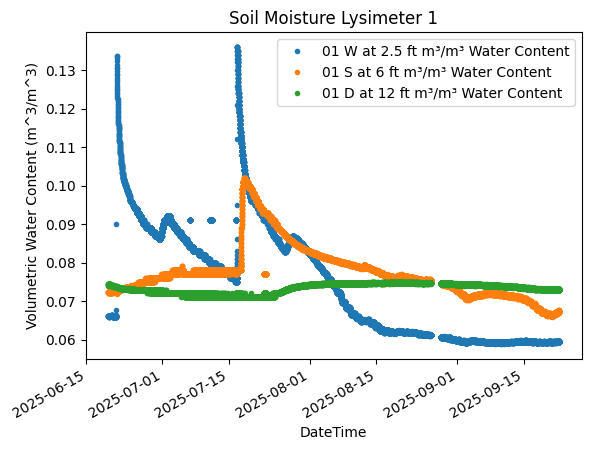

In [ ]:
log_df['01 W at 2.5 ft m³/m³ Water Content'].plot(linestyle='', marker='.')
log_df['01 S at 6 ft m³/m³ Water Content'].plot(linestyle='', marker='.')
log_df['01 D at 12 ft m³/m³ Water Content'].plot(linestyle='', marker='.')
plt.legend()
plt.title("Soil Moisture Lysimeter 1")
plt.ylabel("Volumetric Water Content (m^3/m^3)")

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

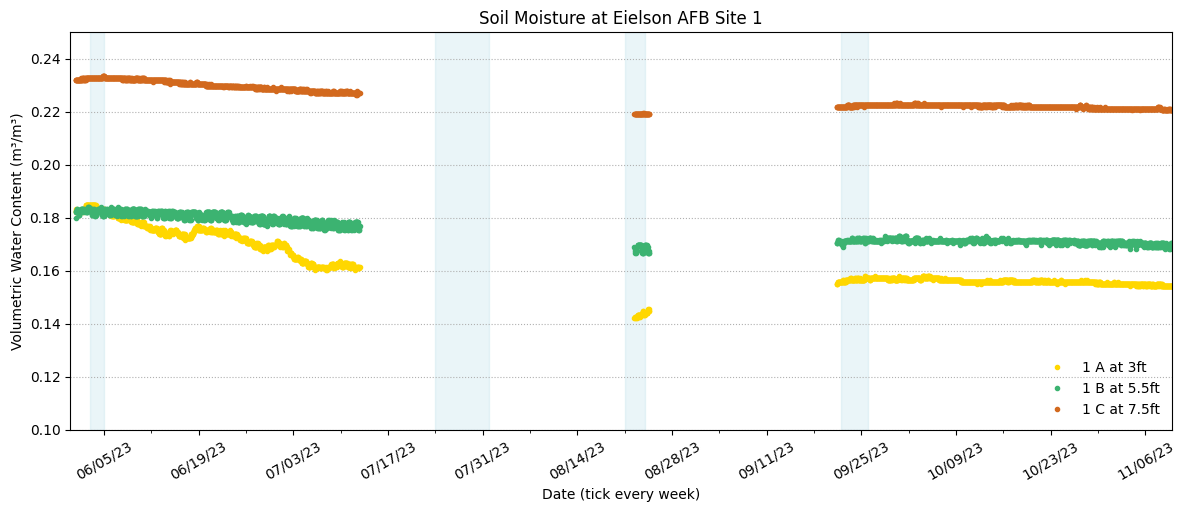

In [ ]:
#Cleaner, simpler version of same code for Eielson:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01A'], label="1 A at 3ft", linestyle='', marker='.', color='gold') 
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01B'], label="1 B at 5.5ft", linestyle='', marker='.', color='mediumseagreen') 
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01C'], label="1 C at 7.5ft", linestyle='', marker='.', color='chocolate')
ax1.set_ylabel("Volumetric Water Content (m³/m³)")
ax1.set_ylim(0.1, 0.25) 
ax1.tick_params(axis="y")
ax1.grid(axis='y', linestyle=':') #add dotted horizontal grid lines for moisture

# Customize x-axis ticks
start_date = datetime(2023, 5, 31)
end_date = datetime(2023, 11, 10) #may want to adjust this depending on what I'm looking at
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)) #sets ticks every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) #date format where m indicates month as number, b indicates month as abbreviation
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)) #sets minor ticks every 1 week
    #ax1.xaxis.set_major_locator(mdates.MonthLocator())  # set major ticks every month
    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Date (tick every week)")

# Highlight a specific date range with semi-transparent colored bars
highlight_ranges = [ #populate with list of date ranges aka tuples
    (datetime(2023, 6, 3), datetime(2023, 6, 5)),
    (datetime(2023, 7, 24), datetime(2023, 8, 1)),
    (datetime(2023, 8, 21), datetime(2023, 8, 24)),
    (datetime(2023, 9, 22), datetime(2023, 9, 26)),
    (datetime(2024, 4, 16), datetime(2024, 4, 23))]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='lightblue', alpha=0.25)  # alpha controls transparency, lower alpha is more transparent
#another way to do this, and have it show up on the legend, would be to modify source data with a new column

# Plot the whole thing and add a title
fig.tight_layout() 
plt.title("Soil Moisture at Eielson AFB Site 1")
plt.legend(loc='lower right', frameon=False)
plt.show()

In [ ]:
#Prepare to compare different nearby sites
print(tdr_s2_df.head())
print(tdr_s3_df.head())
print(tdr_s4_df.head())
print(tdr_s5_df.head()) #this is the odd one, probe A malfunction

                      FT009-LYS02A  FT009-LYS02B  FT009-LYS02C
Date Time, GMT-04:00                                          
2023-05-31 19:21:00         0.2509        0.1811        0.3947
2023-05-31 20:21:00         0.2414        0.1811        0.3961
2023-05-31 21:21:00         0.2414        0.1819        0.3961
2023-05-31 22:21:00         0.2414        0.1819        0.3961
2023-05-31 23:21:00         0.2422        0.1819        0.3961
                      FT0092-LYS03A and C
Date Time, GMT-04:00                     
2023-05-31 15:33:00                0.1695
2023-05-31 16:33:00                0.1659
2023-05-31 17:33:00                0.1659
2023-05-31 18:33:00                0.1659
2023-05-31 19:33:00                0.1652
                      FT0092-LYS04A  FT0092-LYS04C
Date Time, GMT-04:00                              
2023-05-31 15:13:00          0.1528         0.1594
2023-05-31 16:13:00          0.1543         0.1594
2023-05-31 17:13:00          0.1543         0.1594
2023-05-31

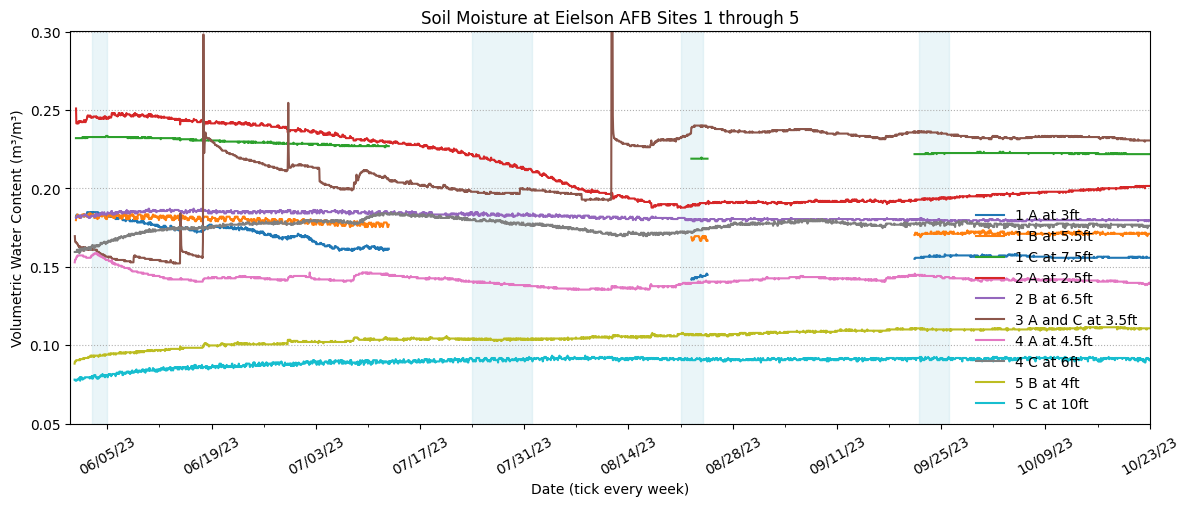

In [ ]:
#Same but compare LYS 01 to 05, all the southern lysimeter sites
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01A'], label="1 A at 3ft")
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01B'], label="1 B at 5.5ft")
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01C'], label="1 C at 7.5ft")
ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02A'], label="2 A at 2.5ft")
ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02B'], label="2 B at 6.5ft")
#ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02C'], label="2 C at 8ft") #exclude b/c near saturation
ax1.plot(tdr_s3_df.index, tdr_s3_df['FT0092-LYS03A and C'], label="3 A and C at 3.5ft")
ax1.plot(tdr_s4_df.index, tdr_s4_df['FT0092-LYS04A'], label="4 A at 4.5ft")
ax1.plot(tdr_s4_df.index, tdr_s4_df['FT0092-LYS04C'], label="4 C at 6ft")
ax1.plot(tdr_s5_df.index, tdr_s5_df['FT092-LYS05B'], label="5 B at 4ft")
ax1.plot(tdr_s5_df.index, tdr_s5_df['FT092-LYS05C'], label="5 C at 10ft")
ax1.set_ylabel("Volumetric Water Content (m³/m³)")
ax1.set_ylim(0.05, 0.3) 
ax1.tick_params(axis="y")
ax1.grid(axis='y', linestyle=':') #add dotted horizontal grid lines for moisture

# Customize x-axis ticks
start_date = datetime(2023, 5, 31)
end_date = datetime(2023, 10, 23) #may want to adjust this depending on what I'm looking at
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)) #sets ticks every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) #date format where m indicates month as number, b indicates month as abbreviation
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)) #sets minor ticks every 1 week
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Date (tick every week)")

# Highlight a specific date range with semi-transparent colored bars
highlight_ranges = [ #populate with list of date ranges aka tuples
    (datetime(2023, 6, 3), datetime(2023, 6, 5)),
    (datetime(2023, 7, 24), datetime(2023, 8, 1)),
    (datetime(2023, 8, 21), datetime(2023, 8, 24)),
    (datetime(2023, 9, 22), datetime(2023, 9, 26)),
    (datetime(2024, 4, 16), datetime(2024, 4, 23))]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='lightblue', alpha=0.25)  # alpha controls transparency, lower alpha is more transparent

# Plot the whole thing and add a title
fig.tight_layout() 
plt.title("Soil Moisture at Eielson AFB Sites 1 through 5")
plt.legend(loc='lower right', frameon=False)
plt.show()

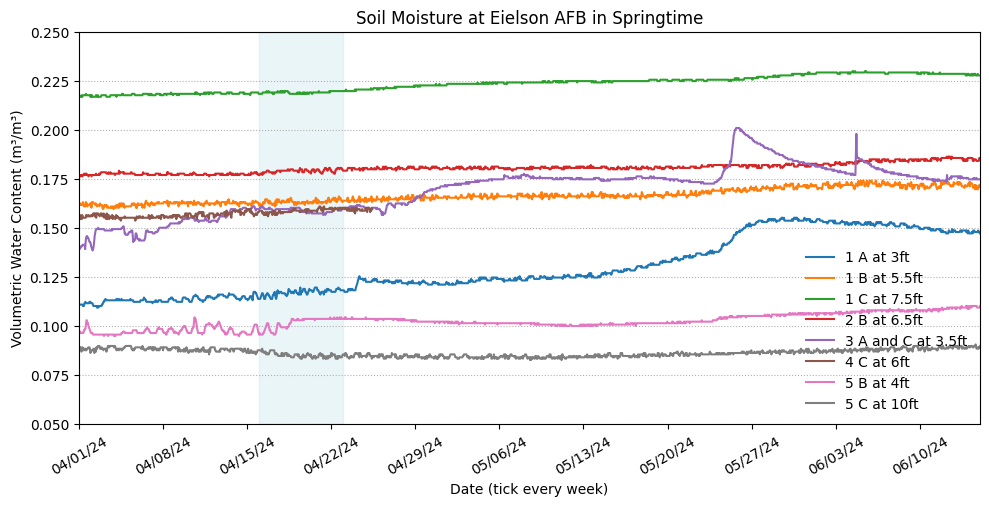

In [ ]:
#Same but for springtime
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01A'], label="1 A at 3ft")
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01B'], label="1 B at 5.5ft")
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01C'], label="1 C at 7.5ft")
#ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02A'], label="2 A at 2.5ft") #appears still to be frozen until late May
ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02B'], label="2 B at 6.5ft")
#ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02C'], label="2 C at 8ft") #exclude b/c near saturation
ax1.plot(tdr_s3_df.index, tdr_s3_df['FT0092-LYS03A and C'], label="3 A and C at 3.5ft")
#ax1.plot(tdr_s4_df.index, tdr_s4_df['FT0092-LYS04A'], label="4 A at 4.5ft") #so low it appears still to be frozen
ax1.plot(tdr_s4_df.index, tdr_s4_df['FT0092-LYS04C'], label="4 C at 6ft")
ax1.plot(tdr_s5_df.index, tdr_s5_df['FT092-LYS05B'], label="5 B at 4ft")
ax1.plot(tdr_s5_df.index, tdr_s5_df['FT092-LYS05C'], label="5 C at 10ft")
ax1.set_ylabel("Volumetric Water Content (m³/m³)")
ax1.set_ylim(0.05, 0.25) 
ax1.tick_params(axis="y")
ax1.grid(axis='y', linestyle=':') #add dotted horizontal grid lines for moisture

# Customize x-axis ticks
start_date = datetime(2024, 4, 1)
end_date = datetime(2024, 6, 15) #may want to adjust this depending on what I'm looking at
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)) #sets ticks every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) #date format where m indicates month as number, b indicates month as abbreviation
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Date (tick every week)")

# Highlight a specific date range with semi-transparent colored bars
highlight_ranges = [(datetime(2024, 4, 16), datetime(2024, 4, 23))]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='lightblue', alpha=0.25)  # alpha controls transparency, lower alpha is more transparent

# Plot the whole thing and add a title
fig.tight_layout() 
plt.title("Soil Moisture at Eielson AFB in Springtime")
plt.legend(loc='lower right', frameon=False)
plt.show()

# confirm missing LYS 04 data for 4/26/24 onward, battery not plotting issue


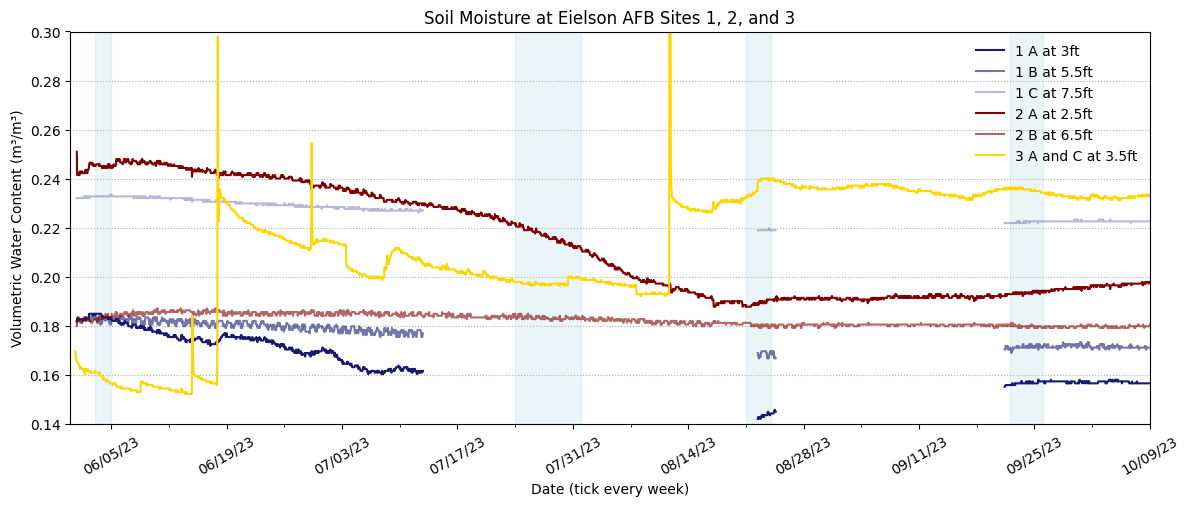

In [ ]:
#Compare only LYS 01, 02, and 03
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01A'], label="1 A at 3ft", color='midnightblue') 
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01B'], label="1 B at 5.5ft", color='midnightblue', alpha=0.6) 
ax1.plot(tdr_s1_df.index, tdr_s1_df['FT009-LYS01C'], label="1 C at 7.5ft", color='midnightblue', alpha=0.3) 
ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02A'], label="2 A at 2.5ft", color='maroon') 
ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02B'], label="2 B at 6.5ft", color='maroon', alpha=0.6)
#ax1.plot(tdr_s2_df.index, tdr_s2_df['FT009-LYS02C'], label="2 C at 8ft", color='marnoon', alpha=0.3) #exclude b/c near saturation
ax1.plot(tdr_s3_df.index, tdr_s3_df['FT0092-LYS03A and C'], label="3 A and C at 3.5ft", color='gold') #mediumseagreen')
ax1.set_ylabel("Volumetric Water Content (m³/m³)")
ax1.set_ylim(0.14, 0.3) 
ax1.tick_params(axis="y")
ax1.grid(axis='y', linestyle=':') #add dotted horizontal grid lines for moisture

# Customize x-axis ticks
start_date = datetime(2023, 5, 31)
end_date = datetime(2023, 10, 9) #may want to adjust this depending on what I'm looking at
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)) #sets ticks every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) #date format where m indicates month as number, b indicates month as abbreviation
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)) #sets minor ticks every 1 week
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Date (tick every week)")

# Highlight a specific date range with semi-transparent colored bars
highlight_ranges = [ #populate with list of date ranges aka tuples
    (datetime(2023, 6, 3), datetime(2023, 6, 5)),
    (datetime(2023, 7, 24), datetime(2023, 8, 1)),
    (datetime(2023, 8, 21), datetime(2023, 8, 24)),
    (datetime(2023, 9, 22), datetime(2023, 9, 26)),
    (datetime(2024, 4, 16), datetime(2024, 4, 23))]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='lightblue', alpha=0.25)  # alpha controls transparency, lower alpha is more transparent

# Plot the whole thing and add a title
fig.tight_layout() 
plt.title("Soil Moisture at Eielson AFB Sites 1, 2, and 3")
plt.legend(loc='upper right', frameon=False)
plt.show()

In [ ]:
print(pw_df.columns)
pw_df.head()

Index(['Date', 'Event', 'Lysimeter', 'Depth (ft)', 'Depth (cm)', 'Old Header',
       '11CL-PF3OUDS', '3:3FTCA', '4:2FTS', '5:3FTCA', '6:2FTS', '7:3FTCA',
       '8:2FTS', '9CL-PF3ONS', 'ADONA', 'HFPO-DA', 'NEtFOSA', 'NEtFOSAA',
       'NEtFOSE', 'NFDHA', 'NMeFOSA', 'NMeFOSAA', 'NMeFOSE', 'PFBA', 'PFBS',
       'PFDA', 'PFDOA', 'PFDS', 'PFDoS', 'PFEESA', 'PFHPA', 'PFHPS', 'PFHXA',
       'PFHXS', 'PFMBA', 'PFMPA', 'PFNA', 'PFNS', 'PFOA', 'PFOS', 'PFOSA',
       'PFPEA', 'PFPES', 'PFTEDA', 'PFTRDA', 'PFUnA', 'SumShort', 'SumLong',
       'SumOther', 'Sum40'],
      dtype='object')


,Date,Event,Lysimeter,Depth (ft),Depth (cm),Old Header,11CL-PF3OUDS,3:3FTCA,4:2FTS,5:3FTCA,...,PFOSA,PFPEA,PFPES,PFTEDA,PFTRDA,PFUnA,SumShort,SumLong,SumOther,Sum40
Index,,,,,,,,,,,,,,,,,,,,,
1A June,2023-06-03,June 2023,A,3.0,91.44,LYS 01 A June Corrected (ug/L),0.000557,0.150812,0.025522,0.139211,...,0.084687,30.162413,6.844548,0.000418,0.000418,0.000418,278.886311,467.777285,2.145742,748.809339
1B June,2023-06-03,June 2023,B,5.5,167.64,LYS 01 B June Corrected (ug/L),0.000635,0.324324,0.028378,0.310811,...,0.007297,39.189189,44.594595,0.000473,0.000473,0.000473,560.810811,2310.990541,4.689297,2876.490649
1C June,2023-06-03,June 2023,C,7.5,228.60,LYS 01 C June Corrected (ug/L),0.000985,0.486618,0.049878,2.068127,...,0.003163,58.394161,145.985401,0.000742,0.000742,0.000742,920.924574,6691.071411,6.704063,7618.700049
1A July,2023-08-01,July 2023,A,3.0,91.44,LYS 01 A July Corrected (ug/L),0.002062,0.350515,0.024742,0.071134,...,0.056701,42.268041,8.144330,0.001546,0.001546,0.001546,338.762887,239.753577,1.893794,580.410258
1B July,2023-08-01,July 2023,B,5.5,167.64,LYS 01 B July Corrected (ug/L),0.002035,0.647182,0.020355,0.156576,...,0.006263,57.933194,49.060543,0.001514,0.001514,0.001514,620.041754,1571.080846,5.835073,2196.957672


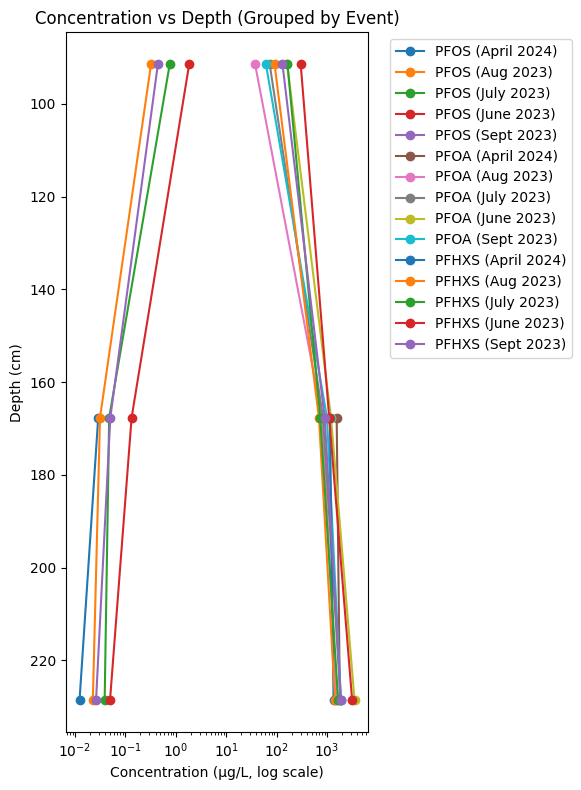

In [ ]:
#Concentration plots
PFAS_concn = pw_df.loc[:, '11CL-PF3OUDS': 'Sum40'] #subset of dataframe with PFAS concentration columns, selected by range of column names

fig, ax = plt.subplots(figsize=(6,8))

selected_pfas = ["PFOS", "PFOA", "PFHXS"] #, "PFBS", "PFBA"] #"SumShort", "SumLong"] #makes list
PFAS_subset = PFAS_concn[selected_pfas] #makes new smaller dataframe to iterate through

for col in selected_pfas: #to loop over different PFAS compounds
    for event, group in pw_df.groupby("Event"): #to loop over and divide different sampling events
        ax.plot(
            group[col],
            group["Depth (cm)"],
            marker="o",
            linestyle="-",
            label=f"{col} ({event})")

ax.invert_yaxis()   # deeper depths downward
ax.set_xscale("log")  # log scale for concentration

ax.set_xlabel("Concentration (µg/L, log scale)")
ax.set_ylabel("Depth (cm)")
ax.set_title("Concentration vs Depth (Grouped by Event)")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

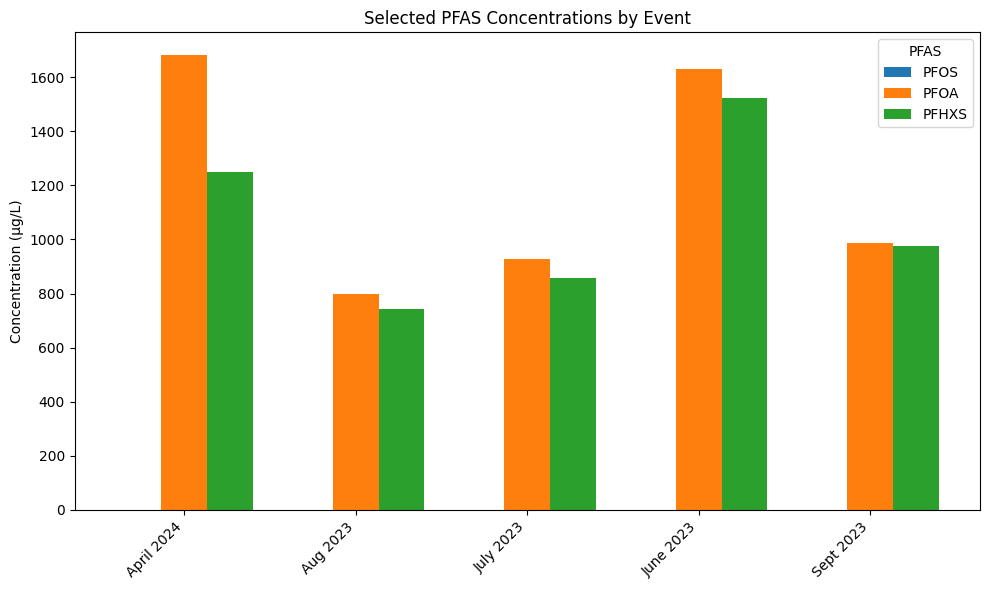

In [ ]:
#Reshape your dataframe into long form
    #Pandas plotting works best when the data is in tidy/long format

selected_pfas = ["PFOS", "PFOA", "PFHXS"] #, "PFBS", "PFBA"] #"SumShort", "SumLong"] #makes list

# Keep only metadata + PFAS columns
df_subset = pw_df[["Event", "Depth (cm)"] + selected_pfas]

# Melt to long format
df_long = df_subset.melt(
    id_vars=["Event", "Depth (cm)"],
    value_vars=selected_pfas,
    var_name="PFAS",
    value_name="Concentration")

# Subset
df_subset = pw_df[["Event"] + selected_pfas]

# Setup bar positions
n_events = len(df_grouped.index)
n_pfas = len(selected_pfas)
x = np.arange(n_events)  # positions for events
bar_width = 0.8 / n_pfas  # split space among PFAS

fig, ax = plt.subplots(figsize=(10,6))

for i, col in enumerate(selected_pfas):
    ax.bar(
        x + i*bar_width, #this is to offset the bars slightly so they show side-by-side
        df_grouped[col],
        width=bar_width,
        label=col)

ax.set_xticks(x + bar_width*(n_pfas-1)/2)
ax.set_xticklabels(df_grouped.index, rotation=45, ha="right")
ax.set_ylabel("Concentration (µg/L)")
ax.set_title("Selected PFAS Concentrations by Event")
ax.legend(title="PFAS")

plt.tight_layout()
plt.show()

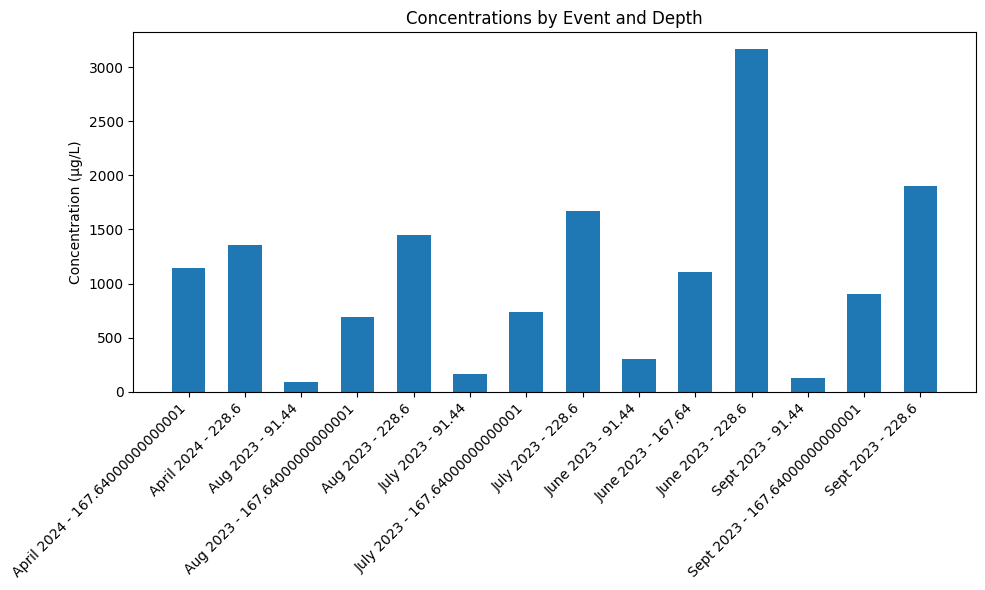

In [ ]:
# Pick just PFHxS
pfhxs_df = pw_df[["Event", "Depth (cm)", "PFHXS"]]  # replace PFOS with exact column name

# Group in case there are duplicates (mean used here)
pfhxs_grouped = pfhxs_df.groupby(["Event", "Depth (cm)"])["PFHXS"].mean().reset_index()

# Make combined label for x-axis
pfhxs_grouped["EventDepth"] = pfhxs_grouped["Event"] + " - " + pfhxs_grouped["Depth (cm)"].astype(str)

# X positions
x = np.arange(len(pfhxs_grouped))
width = 0.6

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, pfhxs_grouped["PFHXS"], width=width)

ax.set_xticks(x)
ax.set_xticklabels(pfhxs_grouped["EventDepth"], rotation=45, ha="right")
ax.set_ylabel("Concentration (µg/L)")
ax.set_title("Concentrations by Event and Depth")

plt.tight_layout()
plt.show()


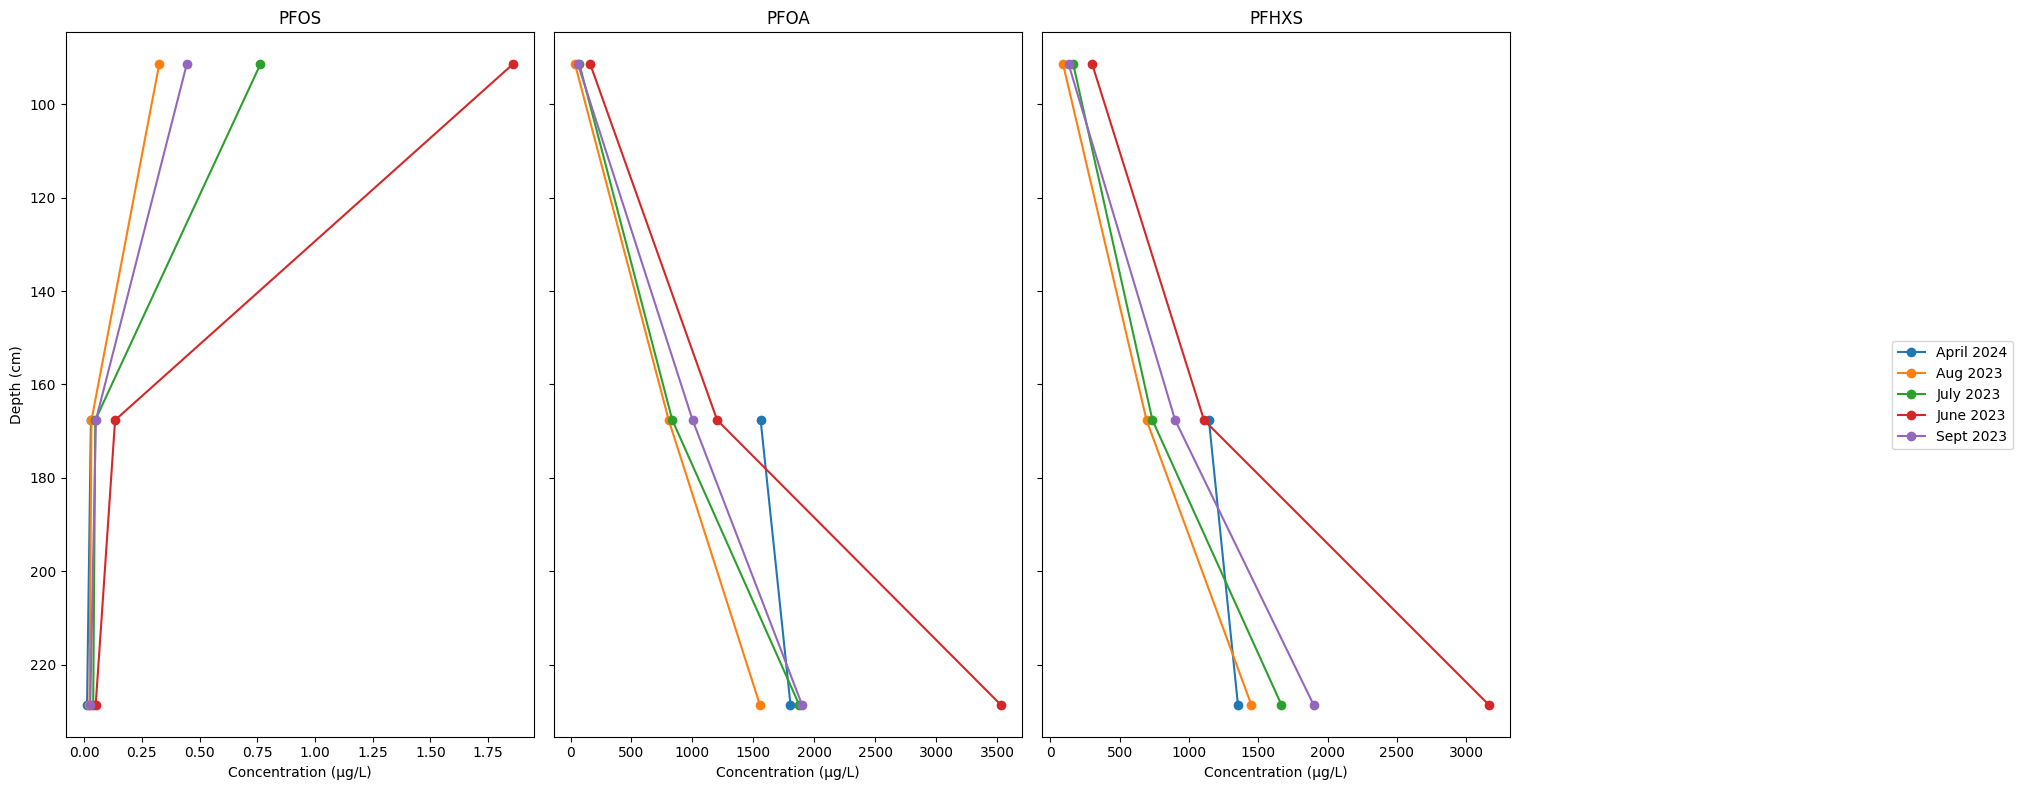

In [ ]:
selected_pfas = ["PFOS", "PFOA", "PFHXS"]  # PFAS to plot

# Set up subplots, one per PFAS
fig, axes = plt.subplots(
    nrows=1, ncols=len(selected_pfas),
    figsize=(6*len(selected_pfas), 8),
    sharey=True)  # all subplots share same depth axis

if len(selected_pfas) == 1:
    axes = [axes]  # make it iterable if only one PFAS

for ax, col in zip(axes, selected_pfas):
    for event, group in pw_df.groupby("Event"):
        ax.plot(
            group[col],
            group["Depth (cm)"],
            marker="o",
            linestyle="-",
            label=event)

    ax.invert_yaxis()
    ax.set_title(col)
    ax.set_xlabel("Concentration (µg/L)")

# Label depth on the shared y-axis
axes[0].set_ylabel("Depth (cm)")

# One legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend
plt.show()


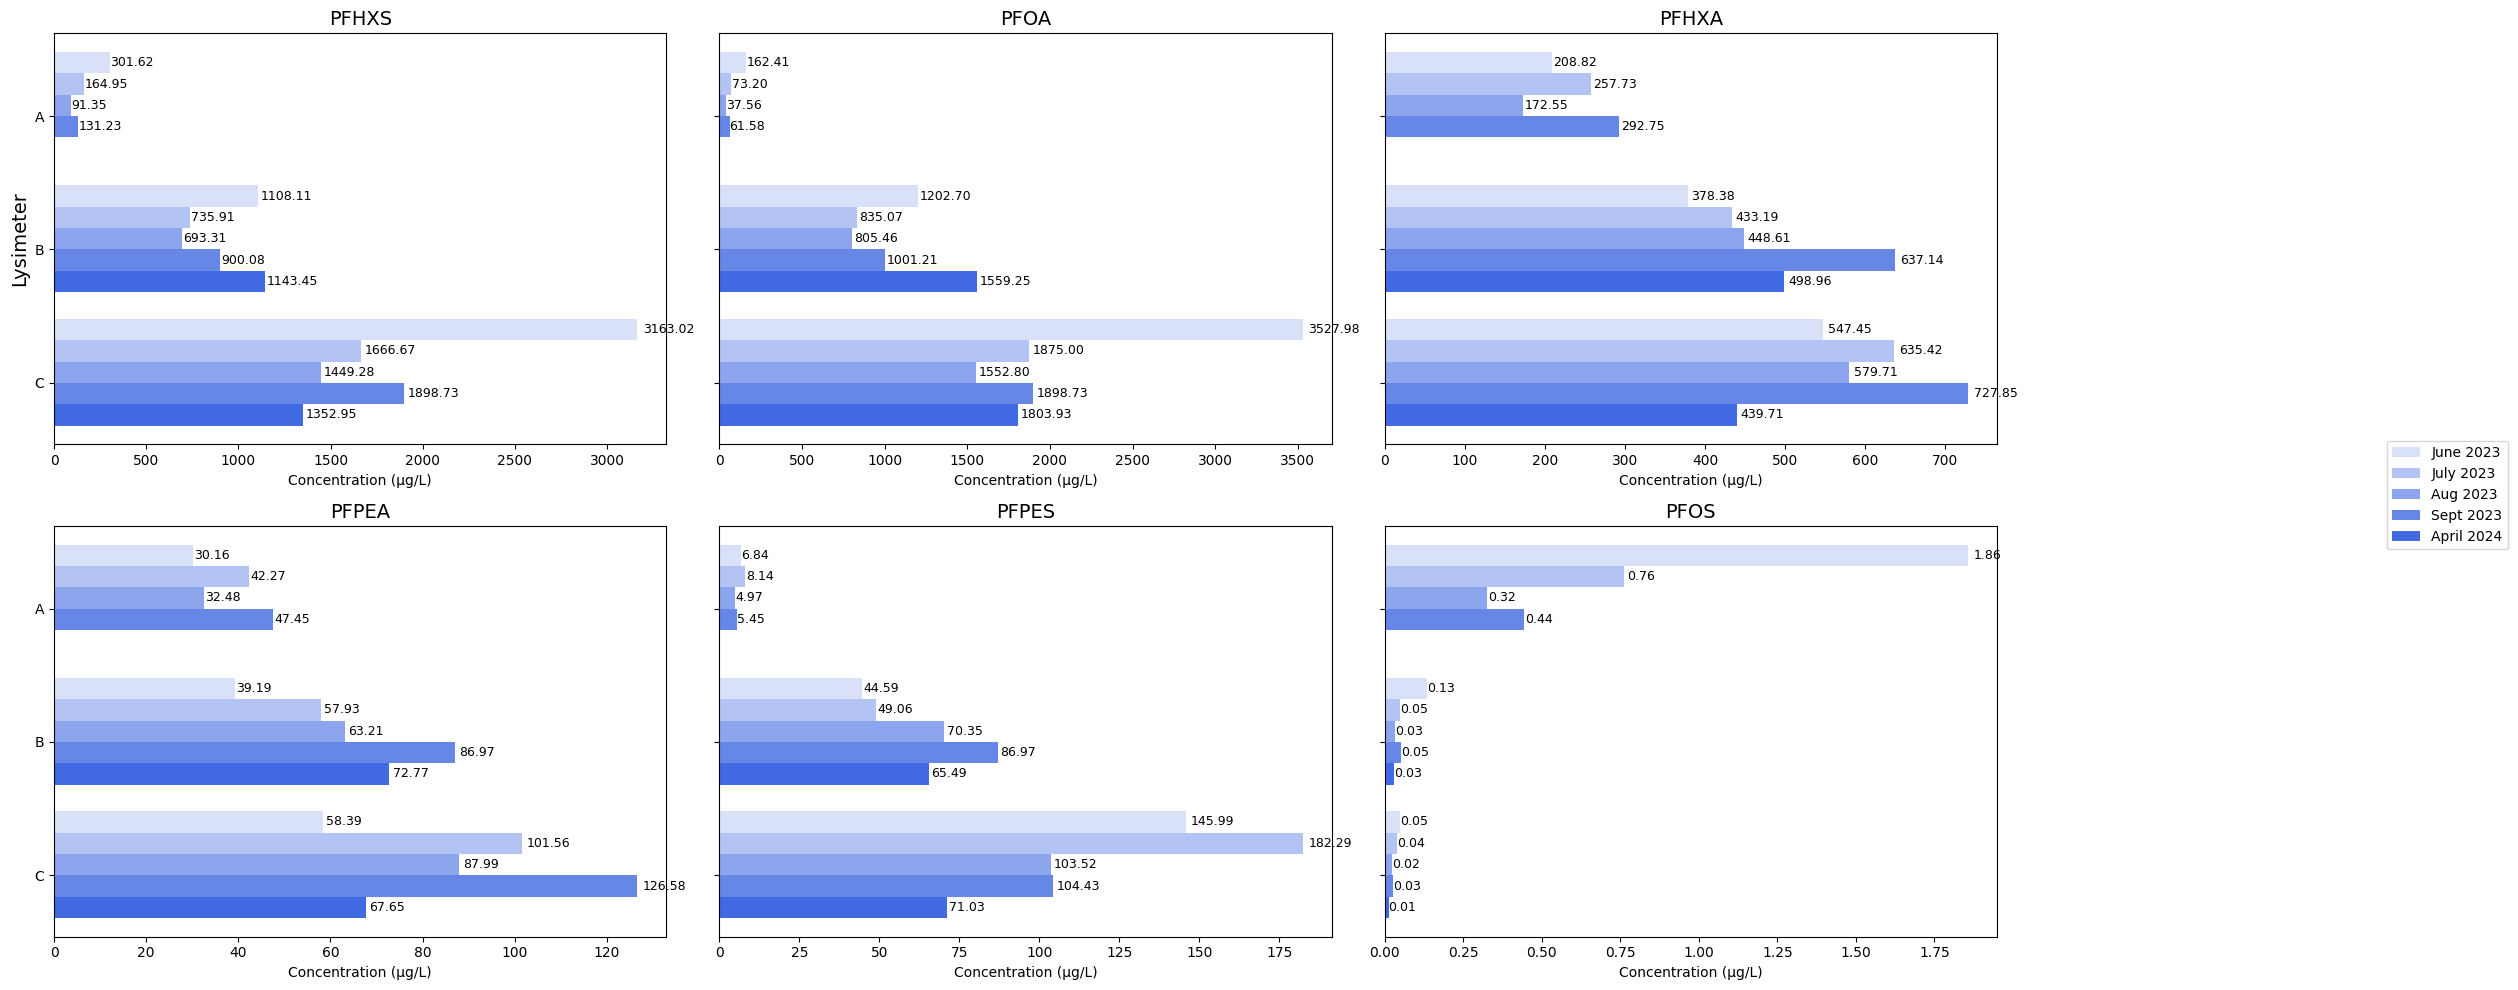

In [ ]:
selected_pfas = ["PFHXS", "PFOA", "PFHXA", "PFPEA", "PFPES", "PFOS"] #in order of high to low concentrations in porewater, with PFOS tacked on at the end
n_cols = 3  #number of plots per row
n_rows = int(np.ceil(len(selected_pfas) / n_cols))  #compute rows needed

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols, #number of rows available for plots
    figsize=(8*n_cols, 5*n_rows), 
    sharey=True)
axes = axes.flatten() #must be before the loop, ensure 1D array of axes

# Use categorical y-axis
categories = pw_df["Lysimeter"].unique()  #divides into different categories for y-axis
cat_to_y = {cat: i for i, cat in enumerate(categories)}
y_positions_base = pw_df["Lysimeter"].map(cat_to_y)

events = pw_df["Event"].unique() #divides into different categories each event
bar_height = 0.8 / len(events)

base_color = "royalblue" #tab:blue"
event_color = {"June 2023": 0.2,
    "July 2023": 0.4,
    "Aug 2023": 0.6,
    "Sept 2023": 0.8}

#Plotting loop
for ax, col in zip(axes, selected_pfas):
    for i, event in enumerate(events):
        group = pw_df[pw_df["Event"] == event]
        y_positions = y_positions_base[group.index] + (i - len(events)/2)*bar_height #offsets bars for each event

        bars = ax.barh(y_positions, #set color of bars by event
            group[col],
            height=bar_height,
            color=base_color, 
            alpha=event_color.get(event, 1),  #defaults to 1 or no transparency if not listed
            label=event)

        for bar in bars: #add value labels 
            width = bar.get_width()
            ax.text(
                width * 1.01, # slightly offset to the right
                bar.get_y() + bar.get_height()/2,  # vertical center of bar
                f"{width:.2f}", # formatted value
                va='center', ha='left', fontsize=9)
        
        ax.set_title(col, fontsize=14) #must be inside loop to get all the all titles
        ax.set_xlabel("Concentration (µg/L)")   

# Shared axes labels
ax.set_yticks(list(cat_to_y.values())) 
ax.set_yticklabels(list(cat_to_y.keys()))
axes[0].set_ylabel("Lysimeter", fontsize=14)
ax.invert_yaxis()
            
# One combined legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc="right")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


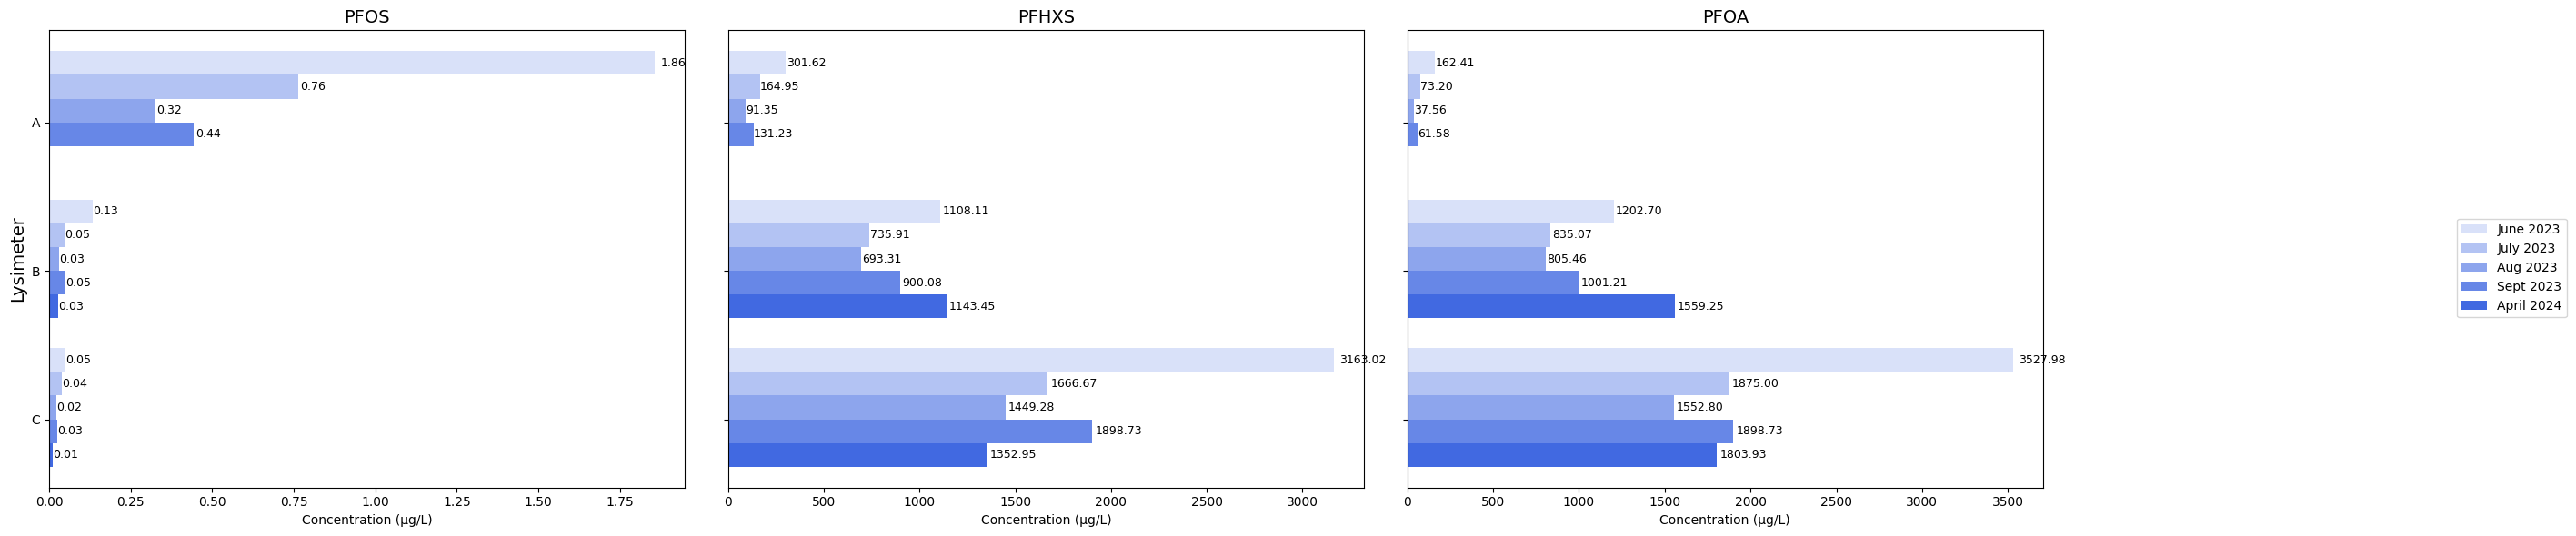

In [ ]:
#Trying to make a nice plot for the manuscript
    #fix font sizes, rounding

selected_pfas = ["PFOS", "PFHXS", "PFOA"]
n_cols = 3  #number of plots per row
n_rows = int(np.ceil(len(selected_pfas) / n_cols))  #compute rows needed

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols, #number of rows available for plots
    figsize=(9*n_cols, 6*n_rows), 
    sharey=True)
axes = axes.flatten() #must be before the loop, ensure 1D array of axes

# Use categorical y-axis
categories = pw_df["Lysimeter"].unique()  #divides into different categories for y-axis
cat_to_y = {cat: i for i, cat in enumerate(categories)}
y_positions_base = pw_df["Lysimeter"].map(cat_to_y)

events = pw_df["Event"].unique() #divides into different categories each event
bar_height = 0.8 / len(events)

base_color = "royalblue" #tab:blue"
event_color = {"June 2023": 0.2,
    "July 2023": 0.4,
    "Aug 2023": 0.6,
    "Sept 2023": 0.8}

#Plotting loop
for ax, col in zip(axes, selected_pfas):
    for i, event in enumerate(events):
        group = pw_df[pw_df["Event"] == event]
        y_positions = y_positions_base[group.index] + (i - len(events)/2)*bar_height #offsets bars for each event

        bars = ax.barh(y_positions, #set color of bars by event
            group[col],
            height=bar_height,
            color=base_color, 
            alpha=event_color.get(event, 1),  #defaults to 1 or no transparency if not listed
            label=event)

        for bar in bars: #add value labels 
            width = bar.get_width()
            ax.text(
                width * 1.01, # slightly offset to the right
                bar.get_y() + bar.get_height()/2,  # vertical center of bar
                f"{width:.2f}", # formatted value
                va='center', ha='left', fontsize=9)
        
        ax.set_title(col, fontsize=14) #must be inside loop to get all the all titles
        ax.set_xlabel("Concentration (µg/L)")   

# Shared axes labels
ax.set_yticks(list(cat_to_y.values())) 
ax.set_yticklabels(list(cat_to_y.keys()))
axes[0].set_ylabel("Lysimeter", fontsize=14)
ax.invert_yaxis()
            
# One combined legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc="right")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


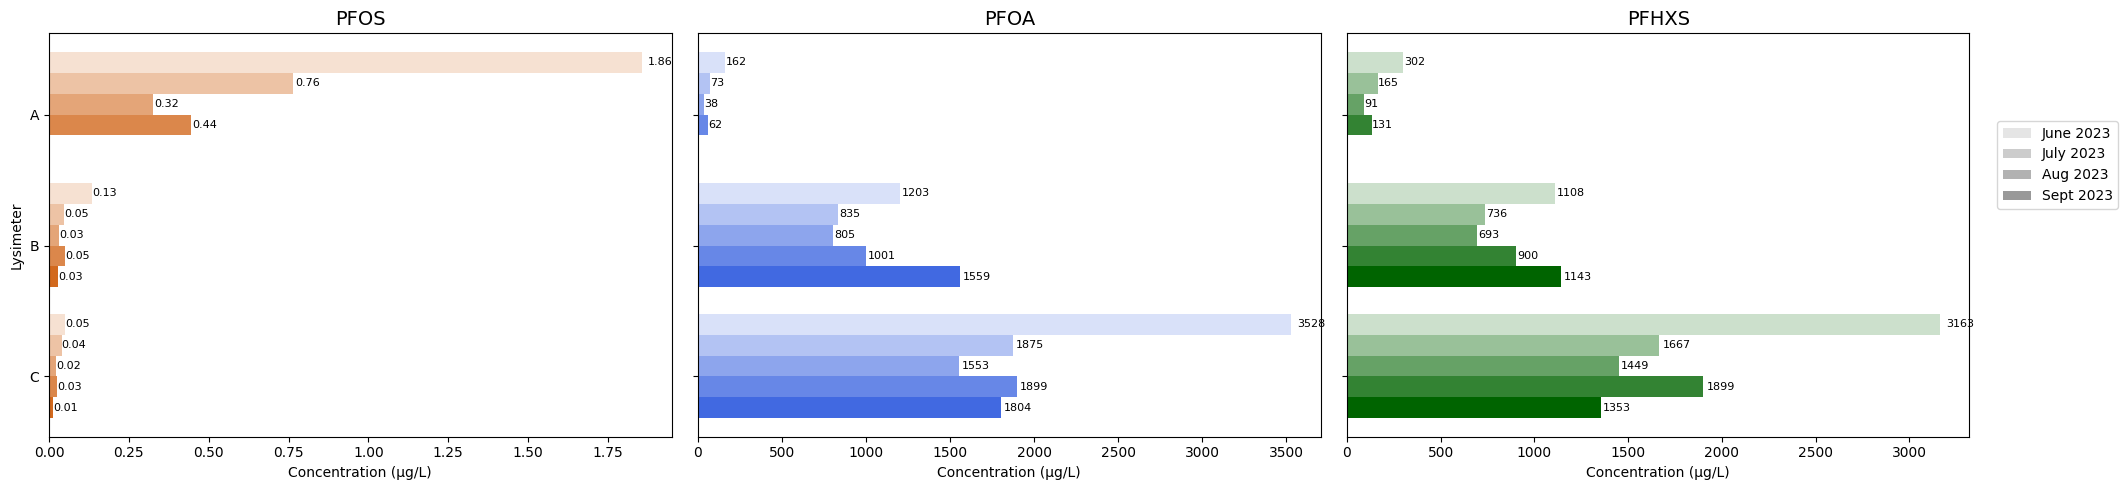

In [21]:
# Three PFAS to plot
from matplotlib.patches import Patch


pfas_list = ["PFOS", "PFOA", "PFHXS"]

# Create 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, 
                         figsize=(25, 5), sharey=True) #first value is width, second is height

# Categorical y-axis
categories = pw_df["Lysimeter"].unique()
cat_to_y = {cat: i for i, cat in enumerate(categories)}
y_positions_base = pw_df["Lysimeter"].map(cat_to_y)

events = pw_df["Event"].unique()
bar_height = 0.8 / len(events)

event_color = {"June 2023": 0.2,
    "July 2023": 0.4,
    "Aug 2023": 0.6,
    "Sept 2023": 0.8}

# --- First plot: PFOS ---
base_color1 = "chocolate"

for i, event in enumerate(events):
    group = pw_df[pw_df["Event"] == event]
    y_positions = y_positions_base[group.index] + (i - len(events)/2) * bar_height

    bars = axes[0].barh(
        y_positions,
        group["PFOS"],
        height=bar_height,
        color=base_color1,
        alpha=event_color.get(event, 1),
        label=event )

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        axes[0].text(
            width * 1.01, #this is offset distance from bar to label
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}", #for two digits after decimal
            va='center', ha='left', fontsize=8)


axes[0].set_title("PFOS", fontsize=14)
axes[0].set_yticks(list(cat_to_y.values()))
axes[0].set_yticklabels(list(cat_to_y.keys()))
axes[0].invert_yaxis()
axes[0].set_xlabel("Concentration (µg/L)")

# --- Second plot: PFOA ---
base_color2 = "royalblue"

for i, event in enumerate(events):
    group = pw_df[pw_df["Event"] == event]
    y_positions = y_positions_base[group.index] + (i - len(events)/2) * bar_height

    bars = axes[1].barh(
        y_positions,
        group["PFOA"],
        height=bar_height,
        color=base_color2,
        alpha=event_color.get(event, 1),
        label=event )

    for bar in bars:
        width = bar.get_width()
        axes[1].text(
            width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f"{width:.0f}", #for no decimal places
            va='center', ha='left', fontsize=8 )

axes[1].set_title("PFOA", fontsize=14)
axes[1].set_xlabel("Concentration (µg/L)")

# --- Third plot: PFHXS ---
base_color3 = "darkgreen"

for i, event in enumerate(events):
    group = pw_df[pw_df["Event"] == event]
    y_positions = y_positions_base[group.index] + (i - len(events)/2) * bar_height

    bars = axes[2].barh(y_positions,
        group["PFHXS"],
        height=bar_height,
        color=base_color3,
        alpha=event_color.get(event, 1),
        label=event )

    for bar in bars:
        width = bar.get_width()
        axes[2].text(
            width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f"{width:.0f}", #for no decimal places
            va='center', ha='left', fontsize=8 )

axes[2].set_title("PFHXS", fontsize=14)
axes[2].set_xlabel("Concentration (µg/L)")

# Shared y-axis label
axes[0].set_ylabel("Lysimeter")

# Combined legend
legend_base_color = "gray"
legend_handles = [Patch(facecolor=legend_base_color, alpha=alpha, label=event)
    for event, alpha in event_color.items() ]
axes[2].legend(handles=legend_handles, #places legend based on final subplot
               bbox_to_anchor=(1.25, 0.8), #first value indicated places it to the right of the axes, second value is vertical placement near top
               fontsize=10) 
#fig.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0.5), loc="center")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
pw_df['PFOS'].max()  # maximum value across all plot

xmax = max(pw_df['PFOS'].max())  # maximum value across all plot
        ax.set_xlim(0, xmax * 1.05)  # 5% extra space for labels

np.float64(1.8561484918793503)